# PCA

## Preparación del entorno

In [18]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Replace 'YOUR_CLIENT_ID' and 'YOUR_CLIENT_SECRET' with your Spotify Developer application credentials
client_id = '11f840e394b549bb9f6d77fb425a4704'
client_secret = '0706ac523bb248fca927ef0ea072dfe4'

# Authenticate with the Spotify API to get an access token
token_url = 'https://accounts.spotify.com/api/token'
data = {'grant_type': 'client_credentials'}
response = requests.post(token_url, data=data, auth=(client_id, client_secret))
token_data = response.json()
access_token = token_data['access_token']


### Cargar Playlist

In [11]:
headers = {
    'Authorization': f'Bearer {access_token}',
}

playlist_id = '37i9dQZF1DXcBWIGoYBM5M'

playlist_url = f'https://api.spotify.com/v1/playlists/{playlist_id}'

response = requests.get(playlist_url, headers=headers)

if response.status_code == 200:
    playlist_data = response.json()
    playlist_name = playlist_data['name']
    track_data = playlist_data['tracks']['items']

    tracks = []

    for track in track_data:
        track_id = track['track']['id']

        # Obtener información detallada de la pista
        track_info_url = f'https://api.spotify.com/v1/audio-features/{track_id}'
        track_info_response = requests.get(track_info_url, headers=headers)

        if track_info_response.status_code == 200:
            track_info = track_info_response.json()
            track_name = track['track']['name']
            artist_names = [artist['name'] for artist in track['track']['artists']]
            album_name = track['track']['album']['name']
            track_uri = track['track']['uri']

            # Extraer características adicionales
            tempo = track_info['tempo']
            energy = track_info['energy']
            duration_ms = track_info['duration_ms']
            popularity = track['track']['popularity']
            danceability = track_info['danceability']
            liveness = track_info['liveness']
            instrumentalness = track_info['instrumentalness']
            valence = track_info['valence']
            acousticness = track_info['acousticness']
            speechiness = track_info['speechiness']
            key = track_info['key']
            mode = track_info['mode']

            tracks.append({
                'Track Name': track_name,
                'Artist(s)': ', '.join(artist_names),
                'Album Name': album_name,
                'Track URI': track_uri,
                'Tempo': tempo,
                'Energy': energy,
                'Duration (ms)': duration_ms,
                'Popularity': popularity,
                'Danceability': danceability,
                'Liveness': liveness,
                'Instrumentalness': instrumentalness,
                'Valence': valence,
                'Acousticness': acousticness,
                'Speechiness': speechiness,
                'Key': key,
                'Mode': mode,
            })

    df = pd.DataFrame(tracks)

    df.to_csv('playlist_data.csv', index=False)

    print(f"Playlist Name: {playlist_name}")
    print(f"Number of Tracks: {len(tracks)}")
else:
    print(f"Error: Unable to fetch playlist data. Status code: {response.status_code}")


Playlist Name: Today's Top Hits 
Number of Tracks: 50


# Ejercicio

## PCA 2 componentes

In [13]:
df.head(3)

,Track Name,Artist(s),Album Name,Track URI,Tempo,Energy,Duration (ms),Popularity,Danceability,Liveness,Instrumentalness,Valence,Acousticness,Speechiness,Key,Mode
0,get him back!,Olivia Rodrigo,GUTS,spotify:track:2gyxAWHebV7xPYVxqoi86f,162.043,0.846,211141,56,0.546,0.6070,0.000000,0.740,0.0135,0.181,5,1
1,Paint The Town Red,Doja Cat,Paint The Town Red,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,99.968,0.538,231750,98,0.868,0.0901,0.000003,0.732,0.2690,0.174,5,1
2,Dance The Night - From Barbie The Album,Dua Lipa,Dance The Night (From Barbie The Album),spotify:track:1vYXt7VSjH9JIM5oRRo7vA,110.056,0.845,176579,97,0.671,0.3290,0.000000,0.775,0.0207,0.048,11,0


In [14]:
df.columns

Index(['Track Name', 'Artist(s)', 'Album Name', 'Track URI', 'Tempo', 'Energy',
       'Duration (ms)', 'Popularity', 'Danceability', 'Liveness',
       'Instrumentalness', 'Valence', 'Acousticness', 'Speechiness', 'Key',
       'Mode'],
      dtype='object')

In [16]:
len(df)

50

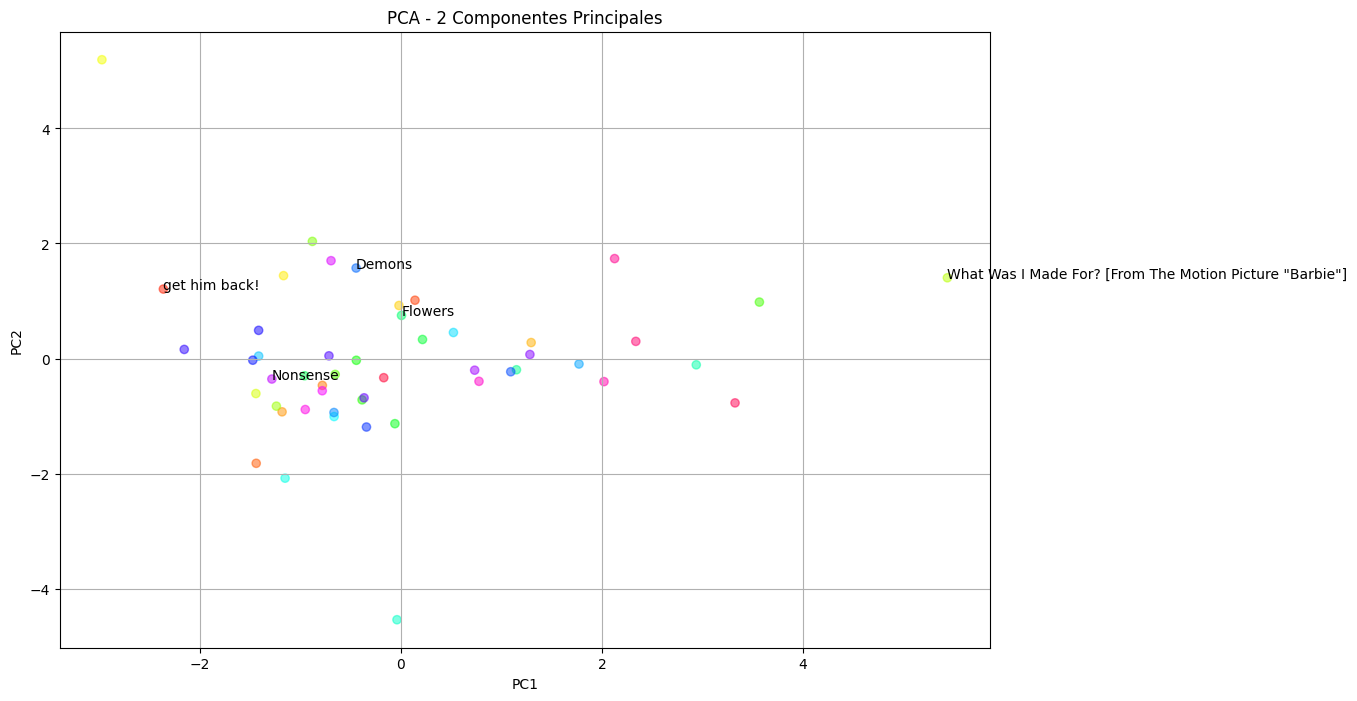

In [27]:
# Seleccionar las columnas numéricas para PCA (excluir las columnas no numéricas)
numeric_columns = ['Tempo', 'Energy', 'Duration (ms)', 'Popularity', 'Danceability',
                   'Liveness', 'Instrumentalness', 'Valence', 'Acousticness',
                   'Speechiness', 'Key', 'Mode']

# Estandarizar los datos
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numeric_columns])

# Crear un nuevo DataFrame con los componentes principales y el nombre de la canción
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Track Name'] = df['Track Name']

# Generar una paleta de colores única basada en el nombre de la canción
unique_track_names = df['Track Name'].unique()
color_palette = sns.color_palette("hsv", len(unique_track_names))

# Asignar un color a cada canción en base al nombre
color_dict = {track_name: color for track_name, color in zip(unique_track_names, color_palette)}
pca_df['Color'] = pca_df['Track Name'].map(color_dict)

# Graficar los 2 primeros componentes principales en un scatterplot con colores
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Color'], alpha=0.5)
plt.title('PCA - 2 Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Agregar etiquetas de nombres de canciones a algunos puntos (ajusta según tus preferencias)
for i in range(len(pca_df)):
    if i % 10 == 0:
        plt.annotate(pca_df.loc[i, 'Track Name'], (pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2']))

plt.grid(True)
plt.show()

## Nota: Se agregó solo el nombre a algunos puntos para evitar el desorden y amontonamiento de etiquetas